In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Завантаження та підготовка даних
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [18]:
# Створення згорткової нейромережі
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.Dense(10, activation='softmax'))

In [19]:
# Компіляція та навчання моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 39s 51ms/step - loss: 0.6381 - accuracy: 0.8035 - val_loss: 0.4999 - val_accuracy: 0.8463
Epoch 2/30
750/750 [==============================] - 66s 87ms/step - loss: 0.4072 - accuracy: 0.8739 - val_loss: 0.3920 - val_accuracy: 0.8748
Epoch 3/30
750/750 [==============================] - 44s 59ms/step - loss: 0.3459 - accuracy: 0.8893 - val_loss: 0.3578 - val_accuracy: 0.8867
Epoch 4/30
750/750 [==============================] - 32s 43ms/step - loss: 0.3133 - accuracy: 0.9004 - val_loss: 0.3152 - val_accuracy: 0.8997
Epoch 5/30
750/750 [==============================] - 32s 42ms/step - loss: 0.2902 - accuracy: 0.9063 - val_loss: 0.3047 - val_accuracy: 0.9026
Epoch 6/30
750/750 [==============================] - 28s 38ms/step - loss: 0.2712 - accuracy: 0.9136 - val_loss: 0.3025 - val_accuracy: 0.9034
Epoch 7/30
750/750 [==============================] - 36s 49ms/step - loss: 0.2553 - accuracy: 0.9194 - val_loss: 0.2889 - val_accuracy:

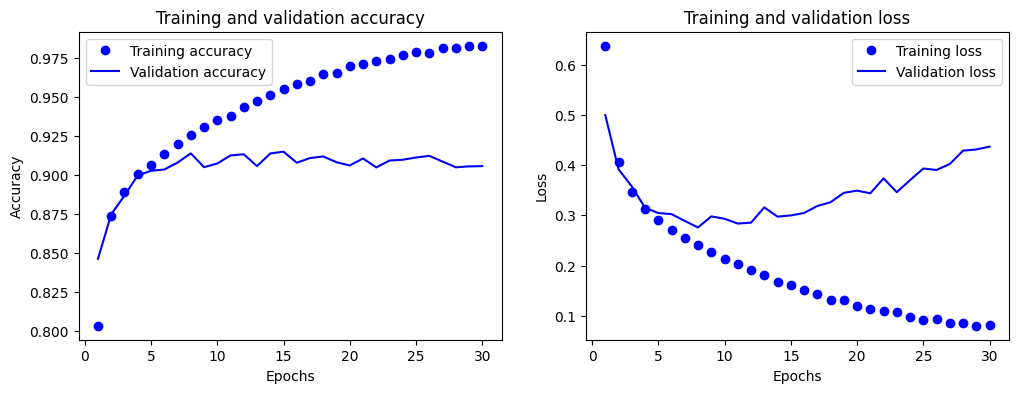

In [21]:
# Графік точності та втрат
epochs = range(1, 31)
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [22]:
# Прогнози для тестових даних
predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1).numpy()
true_labels = tf.argmax(test_labels, axis=1).numpy()

313/313 [==============================] - 2s 6ms/step


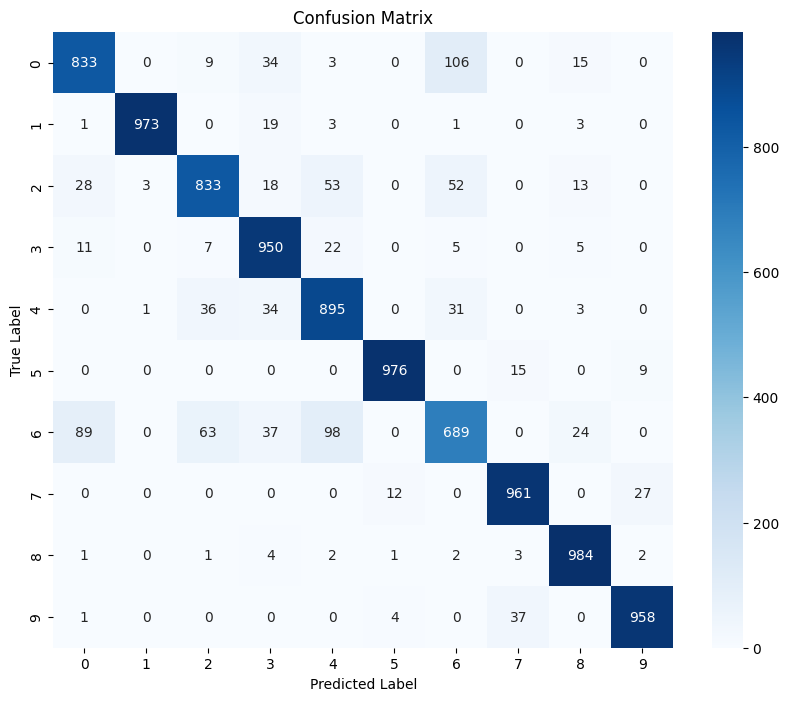

In [23]:
# Матриця помилок
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [26]:
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.88      0.83      0.85      1000
           3       0.87      0.95      0.91      1000
           4       0.83      0.90      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.78      0.69      0.73      1000
           7       0.95      0.96      0.95      1000
           8       0.94      0.98      0.96      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.90      0.91      0.90     10000
weighted avg       0.90      0.91      0.90     10000



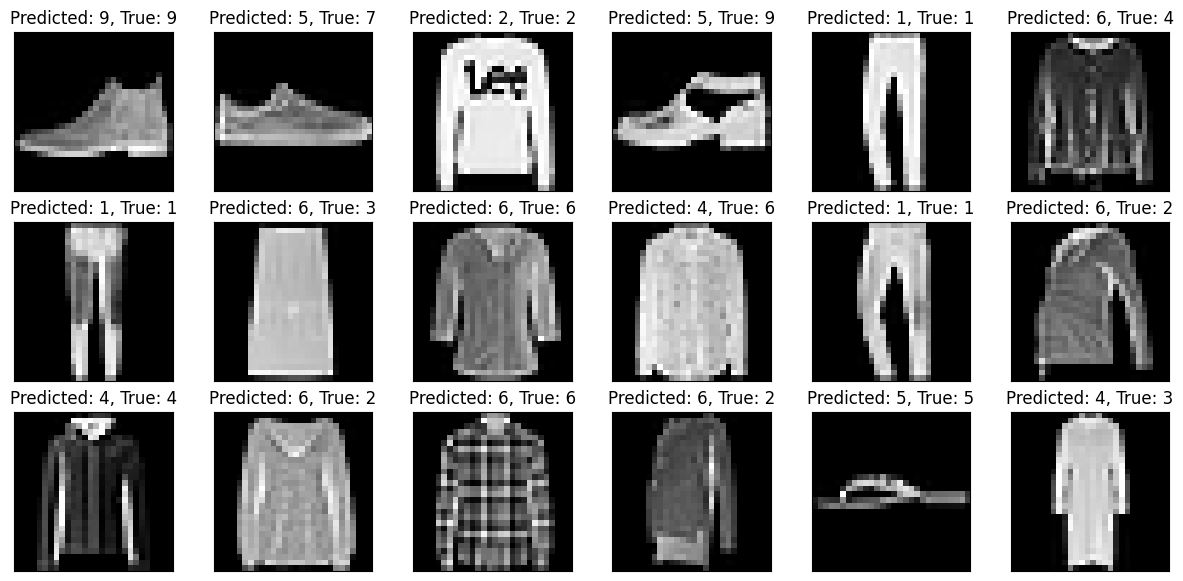

In [27]:
# Результат
correct_indices = np.where(predicted_labels == true_labels)[0]
incorrect_indices = np.where(predicted_labels != true_labels)[0]

plt.figure(figsize=(15, 7))
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 6, 2*i + 1)
    plt.imshow(test_images[correct].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title(f"Predicted: {predicted_labels[correct]}, True: {true_labels[correct]}")
    plt.xticks([])
    plt.yticks([])

for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 6, 2*i + 2)
    plt.imshow(test_images[incorrect].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title(f"Predicted: {predicted_labels[incorrect]}, True: {true_labels[incorrect]}")
    plt.xticks([])
    plt.yticks([])

plt.show()

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 3s 9ms/step - loss: 0.4419 - accuracy: 0.9052
Test accuracy: 0.9052000045776367
